# Visualisasi Animamation Sederhana
buat fungsi untuk mengapdet data per baris

import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# realtime visualisasi dengan modul animation
import matplotlib.animation as animation

In [ ]:
# update line, karena perbaris data
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

sample visualisasi 1

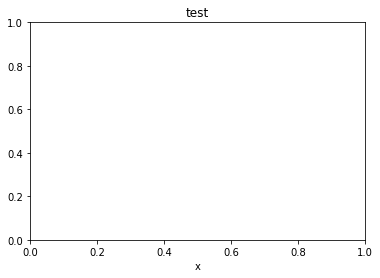

In [ ]:
fig1 = plt.figure()

# menggunakan random state dalam menghasilkan angka acak untuk reproducibility
np.random.seed(19680801)

# input data random dari numpy
data = np.random.rand(2, 25)
# tentukan line plot
l, = plt.plot([], [], 'r-')
# tiap sumbu dimulai dari skala 0 - 1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
# memanggil function FuncAnimation dari plot animasi
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

kemudian membuat grafik baru

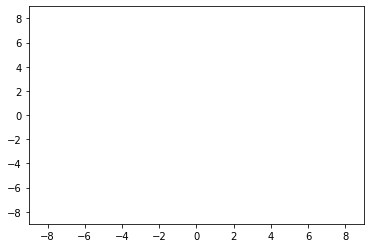

In [ ]:
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, 
# use the following command: im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

# Tutorial Plot Data in Real Time Using Matplotlib
variabelnya bisa terus di tambahin pake data inputan baru secara berulang (looping), kemudian nilai plot juga berubah seiring bertambahnya data

### Menggunakan FuncAnimaton()
dengan menambahkan data pada variabel x dan y

kemudian tampilan grafisnya ikut berubah dengan modul animasi dari matplotlib.animation.FuncAnimation
```
# parameter dan argumen pada FuncAnimation
matplotlib.animation.FuncAnimation(figure, 
                                   func_animate, 
                                   frames=None,
                                   init_func=None, 
                                   fargs=None,
                                   save_count=None, 
                                   *, 
                                   cache_frame_data=True,
                                   **kwargs)
```
*   figure, object gambar pada plot yang bakal terupdate
*   func_animate, fungsi yang dipanggil di tiap frame, 
    *   dimana argumen pertama berasal dari frame berikutnya
*   frames, value pada frame berdasarkan value pada function .range() 
    *   tiap valuenya akan diteruskan ke func_animate
    *   frame bisa di asign kayak list
*   interval, penundaan (delay) antar frame dalam satuan ms

kemudian animasi bisa disimpan dalam format gif atau mp4, dan parameter seperti fps dan dpi

MovieWriter stderr:
[gif @ 0x55cdadef0600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

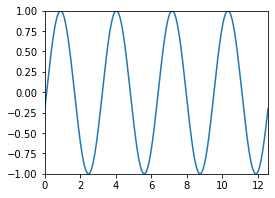

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = []
y = []

figure, ax = plt.subplots(figsize=(4,3))
line, = ax.plot(x, y)
plt.axis([0, 4*np.pi, -1, 1])

def func_animate(i):
    x = np.linspace(0, 4*np.pi, 1000)
    y = np.sin(2 * (x - 0.1 * i))
    
    line.set_data(x, y)
    
    return line,

ani = FuncAnimation(figure, func_animate, frames=10, interval=50)
ani.save(r'animation.gif', fps=10)

plt.show()

### Menggunakan canvas.draw() sama canvas_flush_events()
dengan menambahkan data pada variabel x dan y dengan set_xdata() dan set_ydata()

kemudian updatenya ditampilkan melalui canvas.draw()

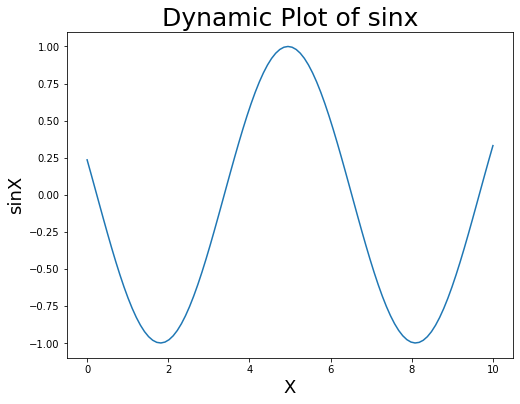

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# masukan data x dan y dari numpy
x = np.linspace(0, 10, 100)
y = np.cos(x)

# untuk membuat plot jadi mode interaktif
# plot tidak akan berubah secara realtime tanpa fungsi ini
plt.ion()

# buat gambar plot
figure, ax = plt.subplots(figsize=(8,6))
line1, = ax.plot(x, y)

# judul dan label
plt.title("Dynamic Plot of sinx",fontsize=25)
plt.xlabel("X",fontsize=18)
plt.ylabel("sinX",fontsize=18)

# buat function perulangan, p merupakan index pada plotnya
for p in range(100):
    updated_y = np.cos(x-0.05*p)
    
    # masukan data pada yang di update
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    # x dan y bakal terupdate secara berulang, 
    # dan plotnya juga ikut berubah secara realtime

    # menggambar canvas
    figure.canvas.draw()
    
    # metode untuk menghapus angka pada setiap iterasi 
    # sehingga angka yang berurutan tidak tumpang tindih
    figure.canvas.flush_events()
    time.sleep(0.1)

### Real Time Scatter Plot
value x dan y yang diubah - ubah, sama tambahin titik scatternya pada setiap iterasi (perulangan)

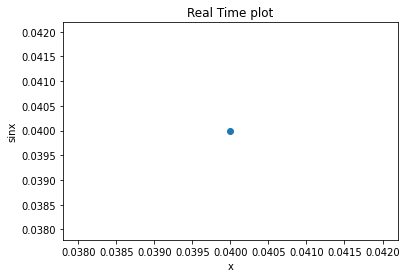

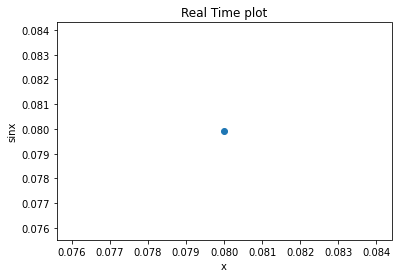

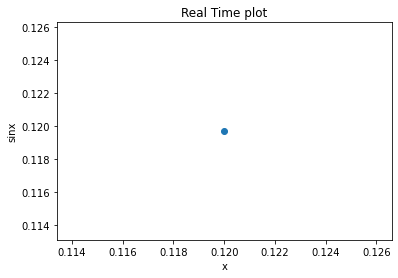

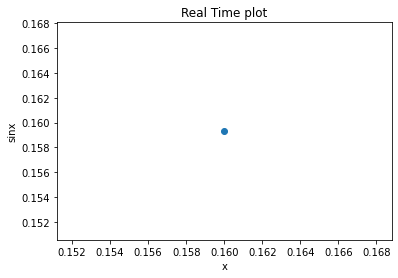

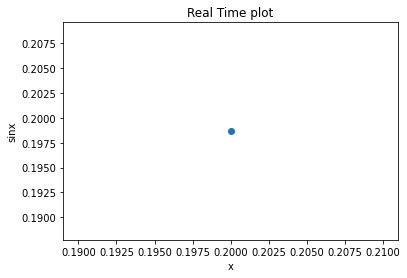

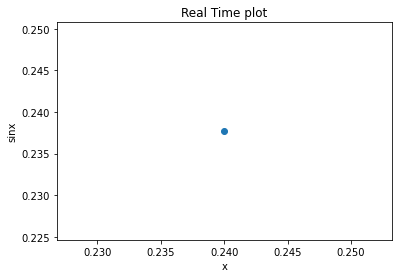

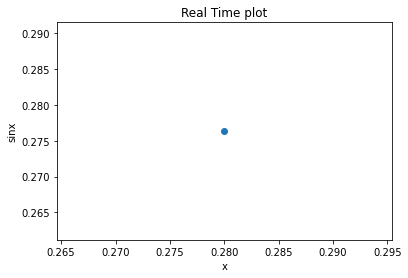

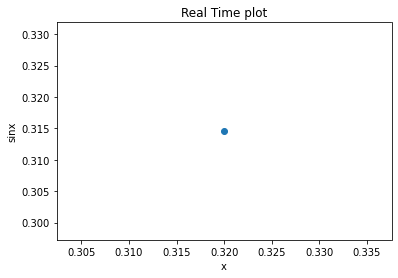

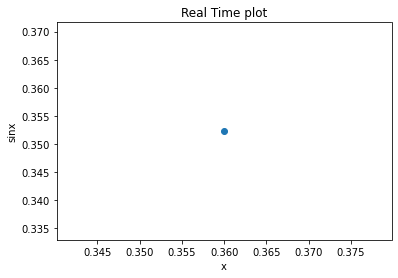

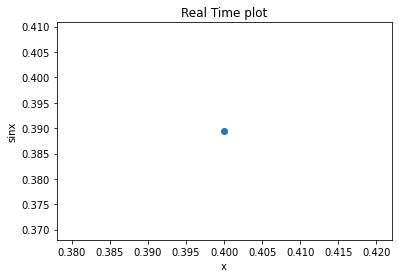

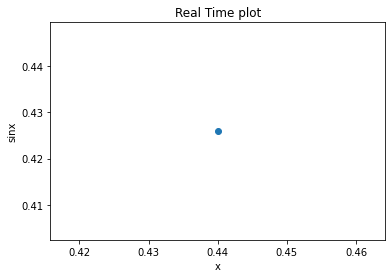

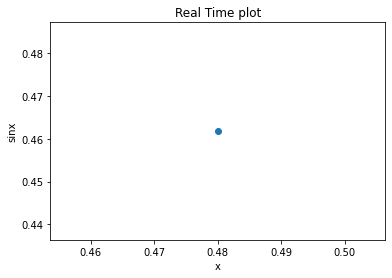

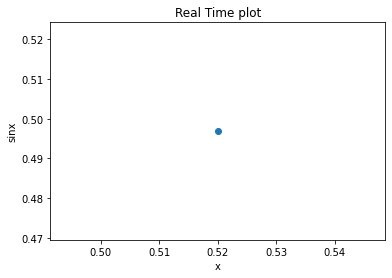

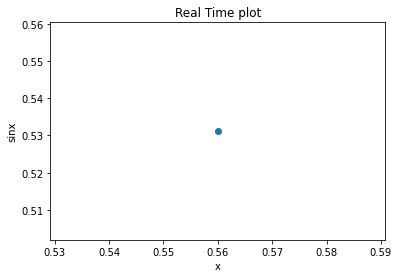

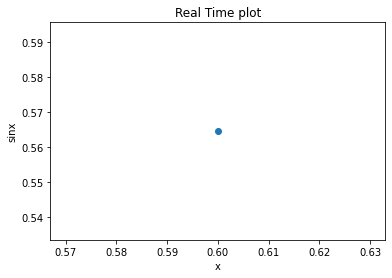

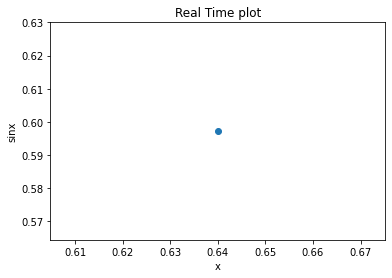

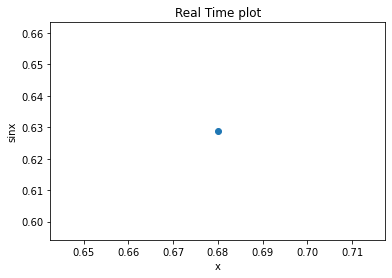

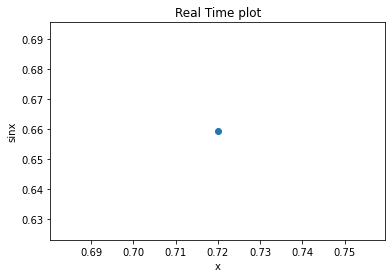

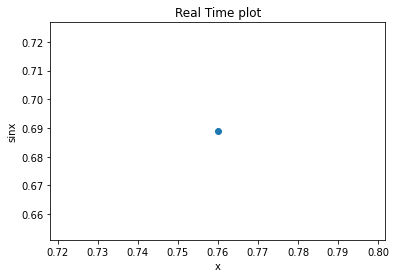

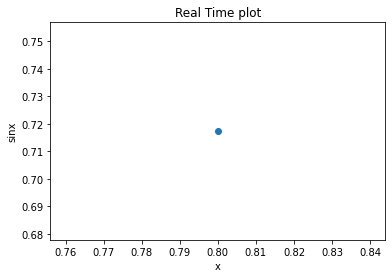

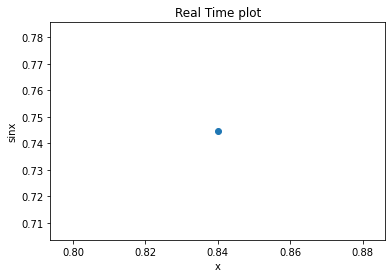

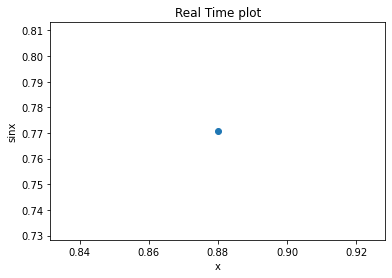

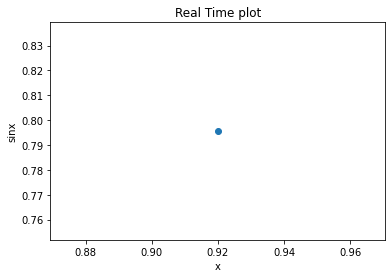

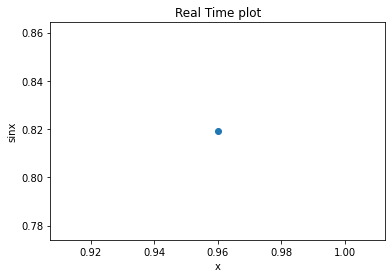

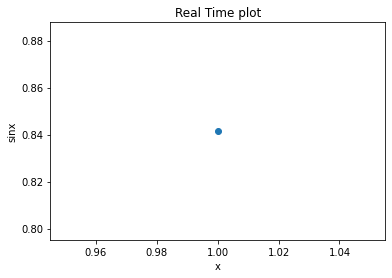

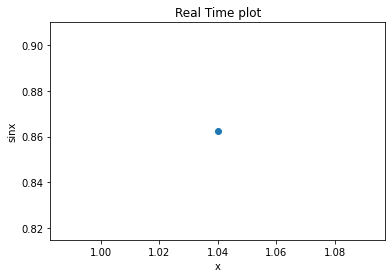

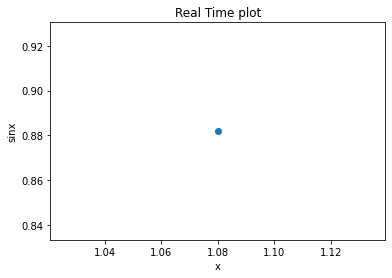

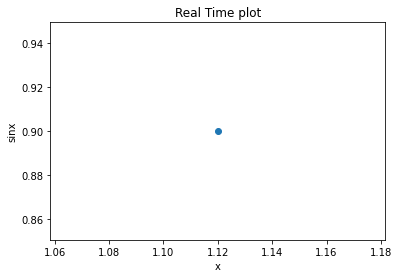

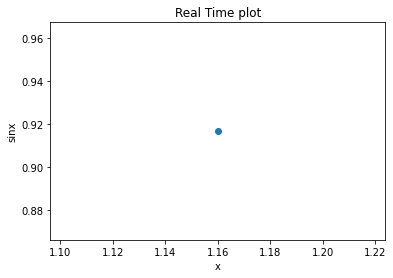

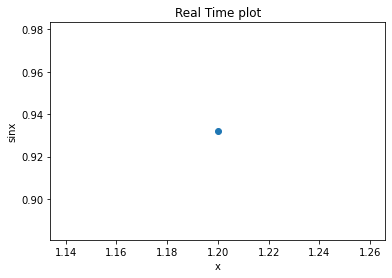

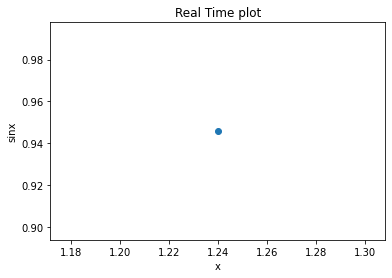

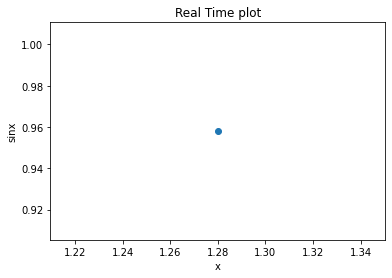

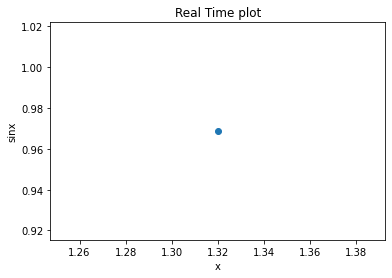

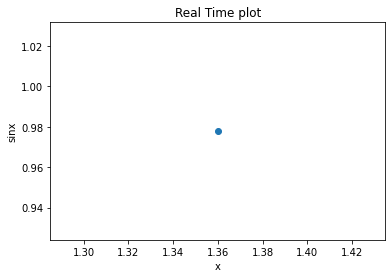

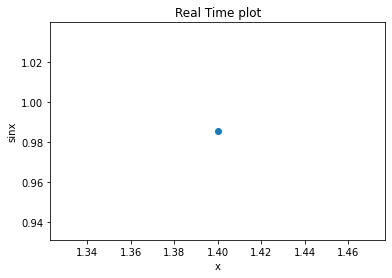

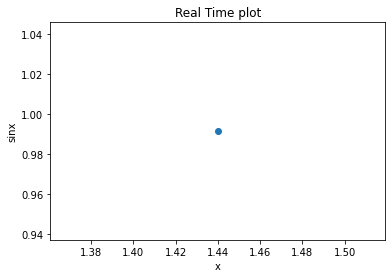

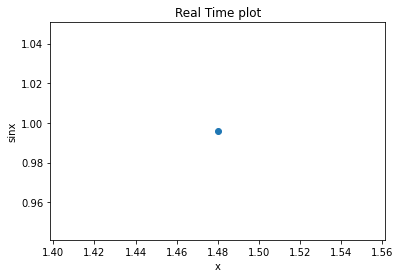

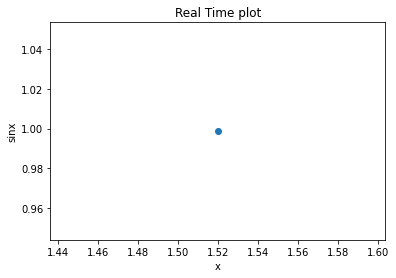

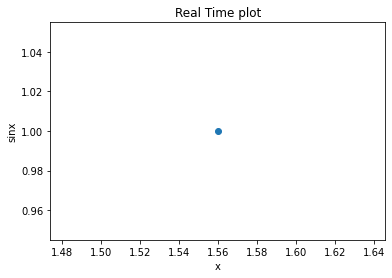

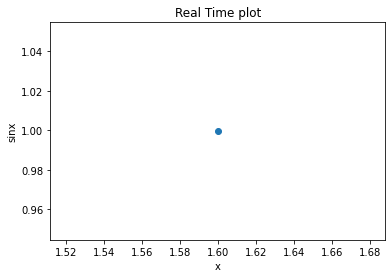

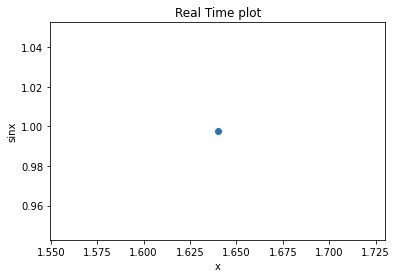

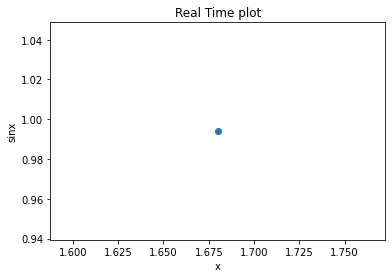

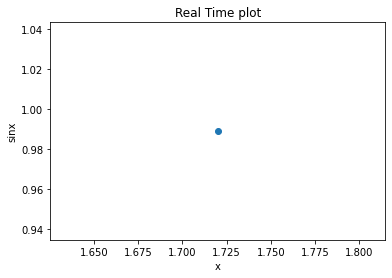

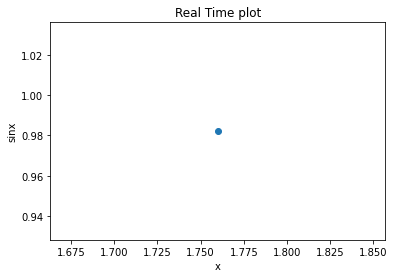

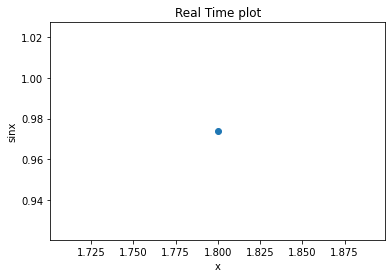

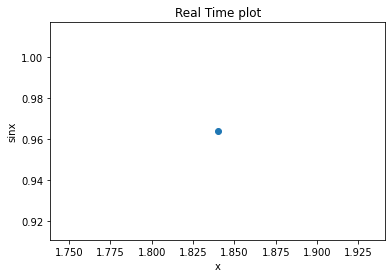

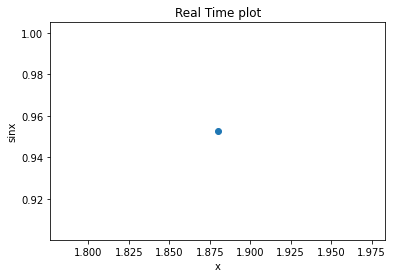

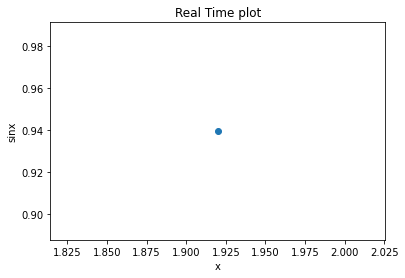

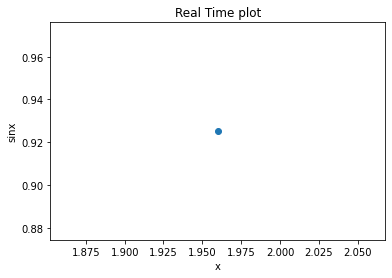

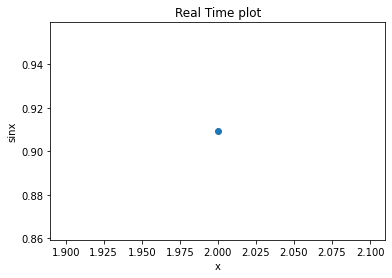

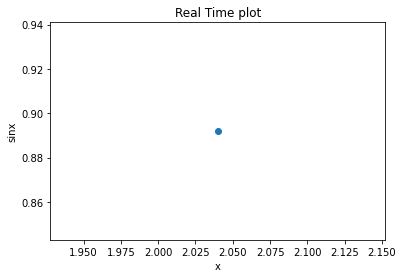

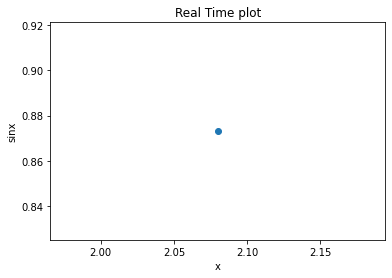

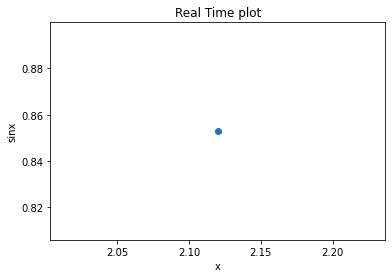

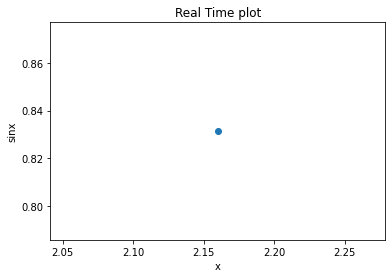

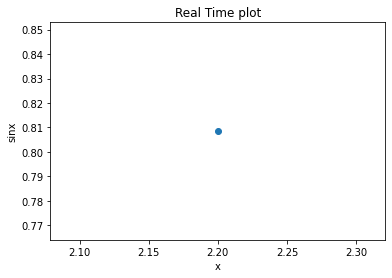

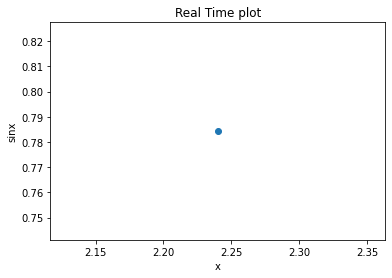

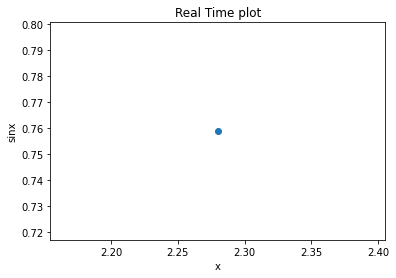

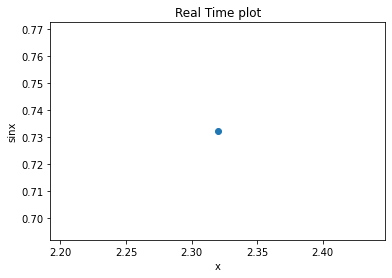

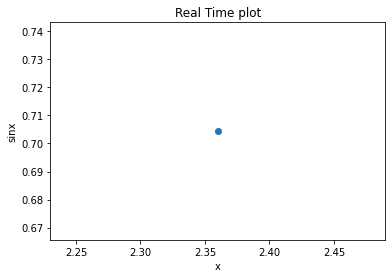

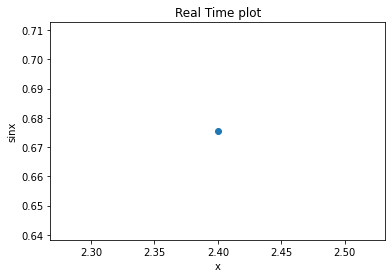

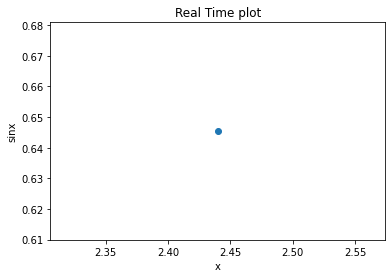

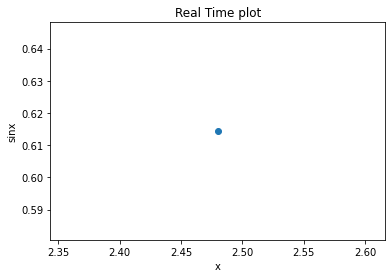

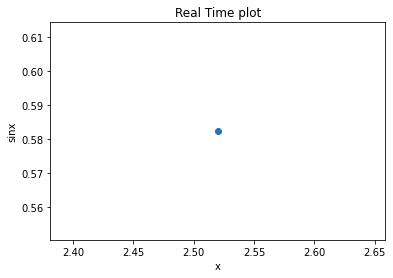

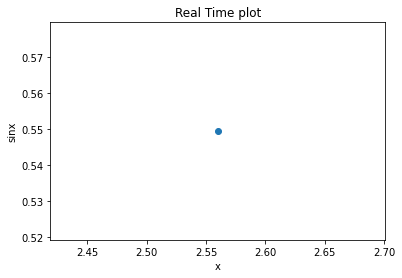

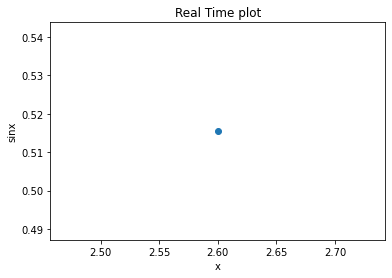

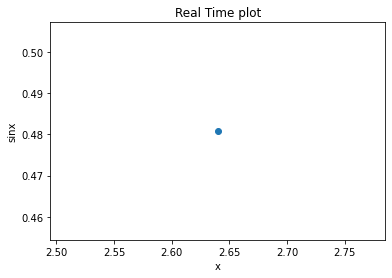

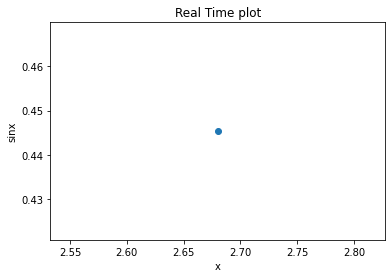

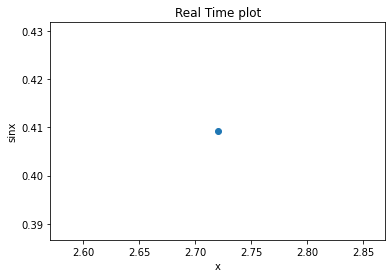

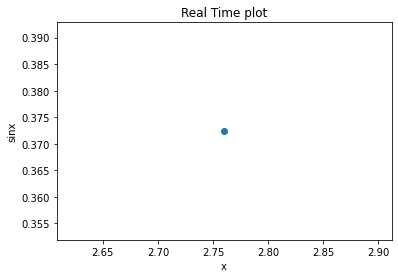

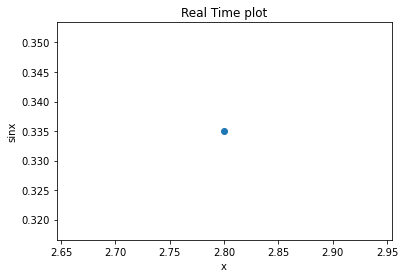

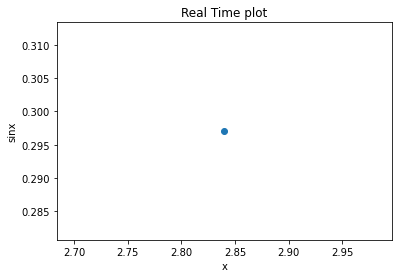

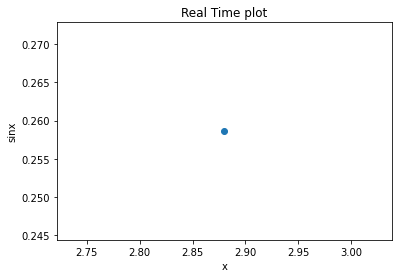

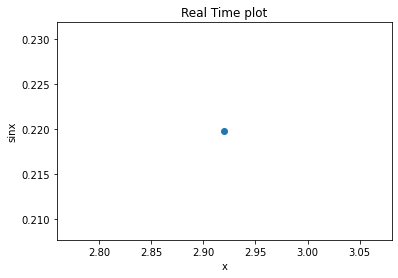

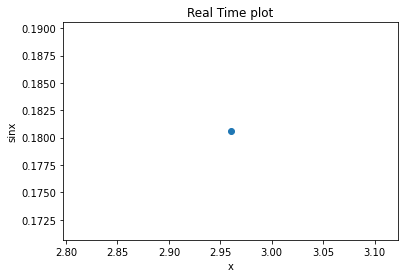

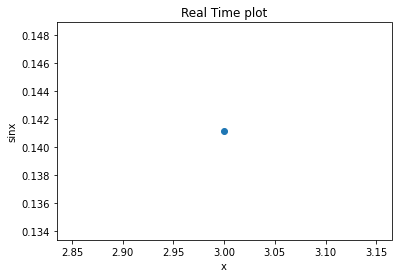

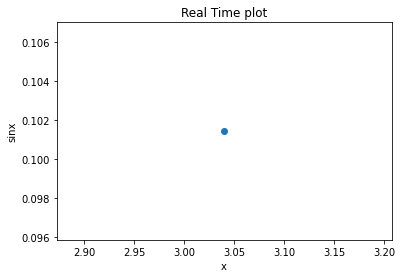

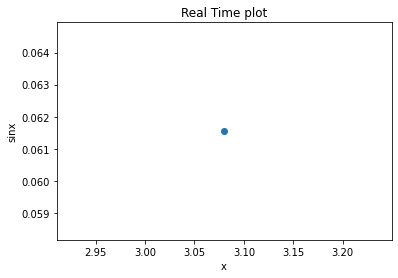

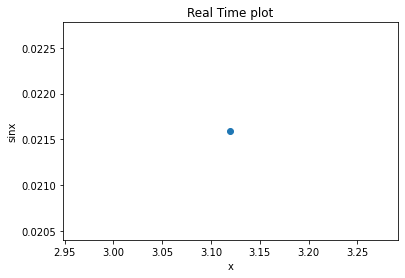

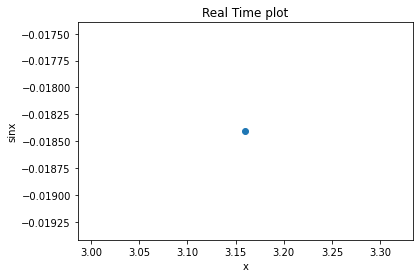

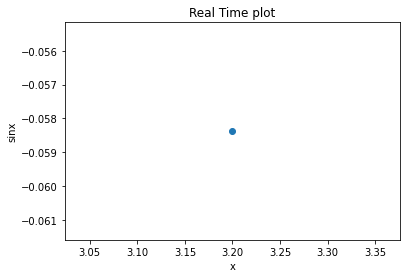

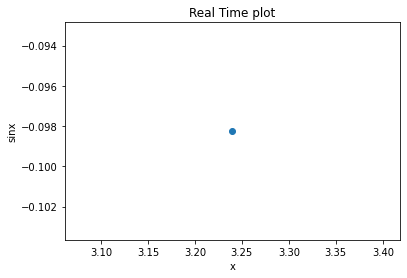

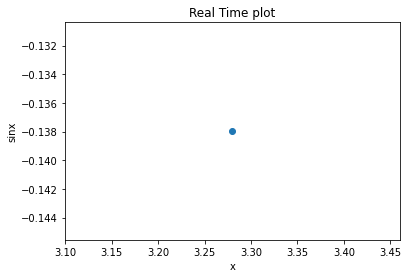

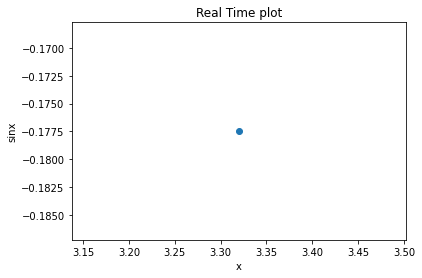

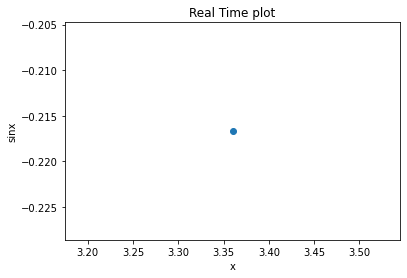

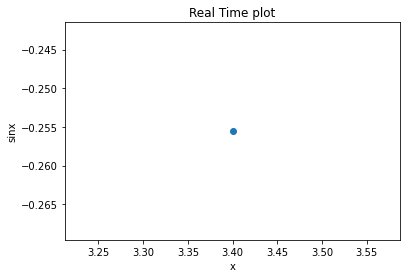

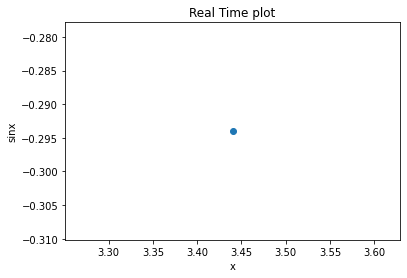

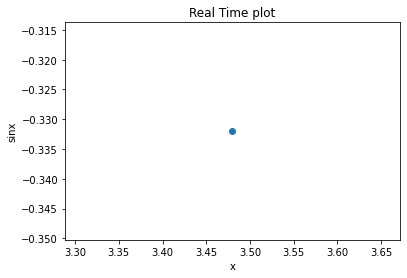

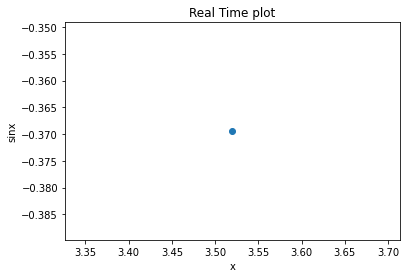

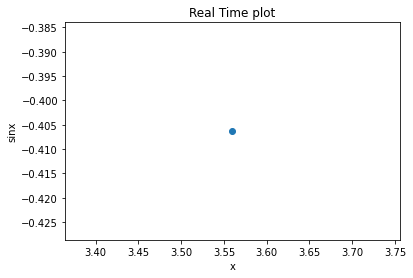

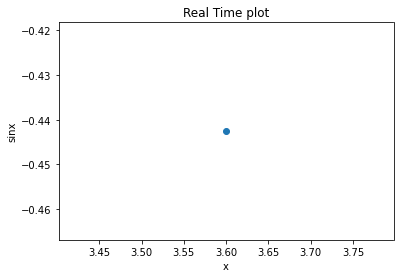

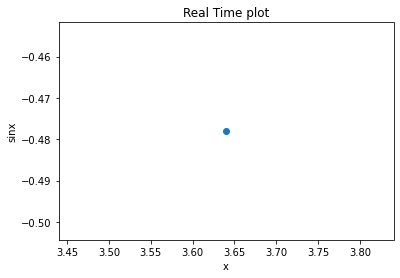

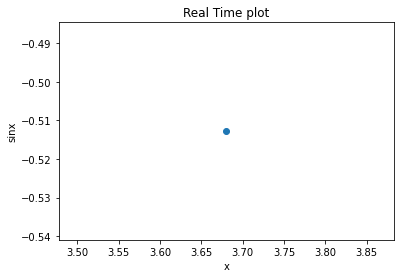

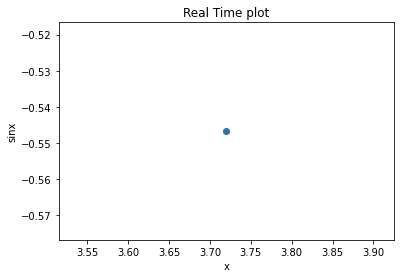

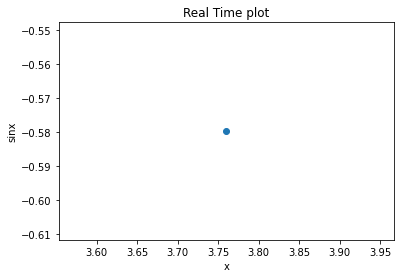

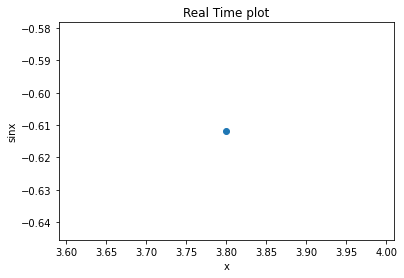

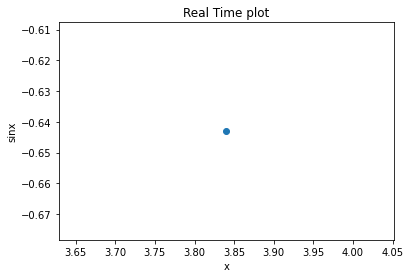

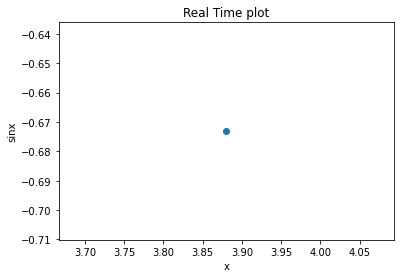

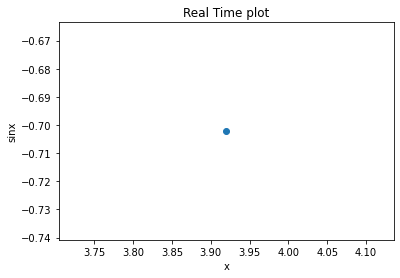

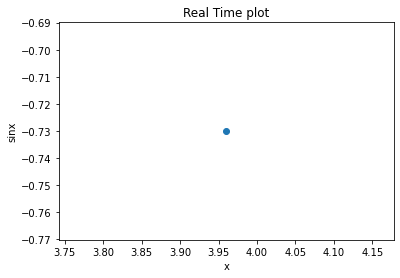

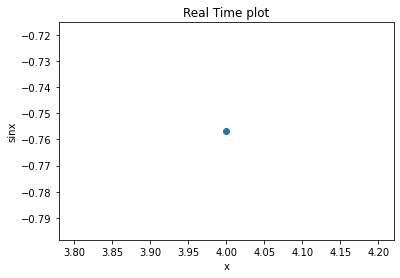

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# inisiasi variabel penampung
x=0
for i in range(100):
    # tiap iterasi nambah 0.04
    x=x+0.04
    # 
    y = np.sin(x)
    
    # buat plot scatternya
    plt.scatter(x, y)
    plt.title("Real Time plot")
    plt.xlabel("x")
    plt.ylabel("sinx")
    # jeda selama 0.05 detik
    plt.pause(0.05)

plt.show()

## Automate Plot Updates in Matplotlib
mengupdate data, diawali dengan bersihin plotnya, kemudian plotnya ada lagi pake loop

### menggunakan canvas.draw() sama canvas_flush_events()
data pada plot diupdate pake set_xdata() ama set_ydata(), trus plotnya digambar pake canvas.draw()

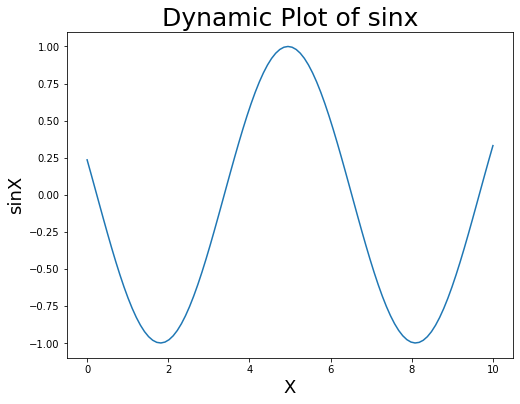

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.cos(x)

# mengaktifkan mode interactive pada plotnya
plt.ion()

# membuat gambar grafik
figure, ax = plt.subplots(figsize=(8,6))
line1, = ax.plot(x, y)

plt.title("Dynamic Plot of sinx",fontsize=25)

plt.xlabel("X",fontsize=18)
plt.ylabel("sinX",fontsize=18)

# buat perulangan looping
for p in range(100):
    # data y yang terupdate, bertambah 5% kali dari p 
    updated_y = np.cos(x-0.05*p)
    
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    # menampilkan gambar
    figure.canvas.draw()
    
    # buat ngehapus gambar yang ada
    figure.canvas.flush_events()
    time.sleep(0.1)

### Update pake plt.draw()
*   matplotlib.pyplot.draw(), buat 
ngotak - ngatik gambar yang diubah kalau lagi mode interaktif
*   matplotlib.pyplot.clf() dan matplotlib.axes.Axes.clear(), buat ngehapus gambar sebelum plot diupdate

pake plt.clf()

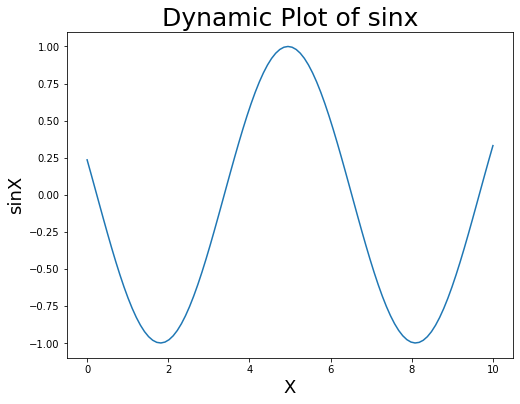

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# data x dan y
x = np.linspace(0, 10, 100)
y = np.cos(x)

# aktifkan mode interaktif
plt.ion()

# buat gambar
figure, ax = plt.subplots(figsize=(8,6))
line1, = ax.plot(x, y)

# title dan label
plt.title("Dynamic Plot of sinx",fontsize=25)
plt.xlabel("X",fontsize=18)
plt.ylabel("sinX",fontsize=18)

for p in range(100):
    # update data y
    updated_y = np.cos(x-0.05*p)
    
    # buat update data x dan y
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    # menggambar plot pada canvas
    figure.canvas.draw()
    
    # apus gambarnya
    figure.canvas.flush_events()
    time.sleep(0.1)

pake fig.clear()

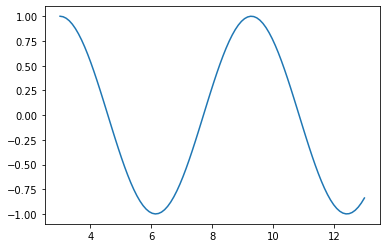

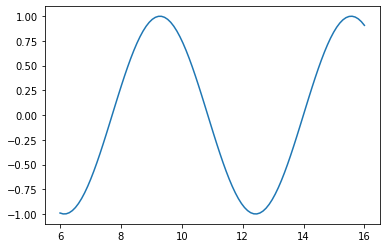

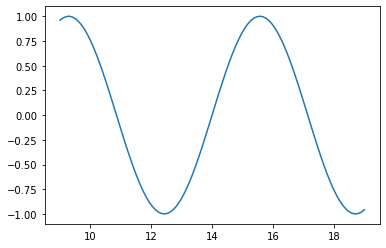

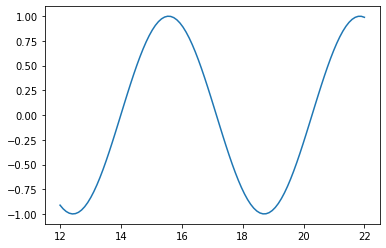

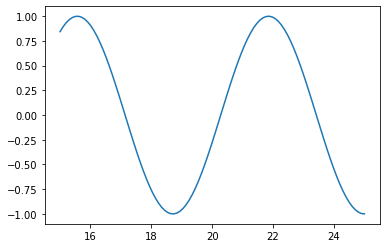

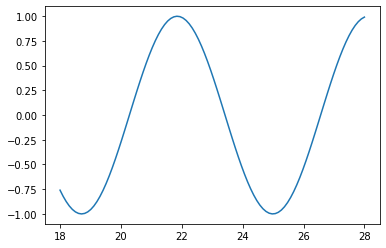

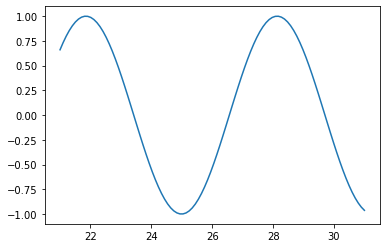

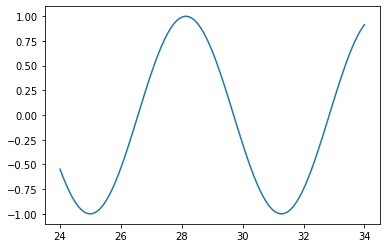

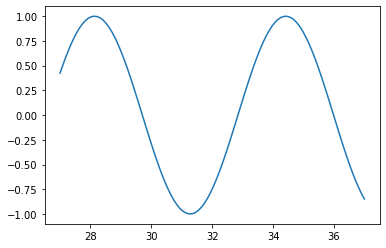

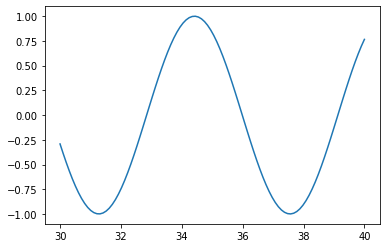

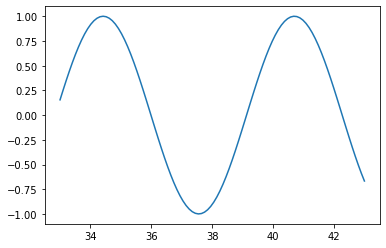

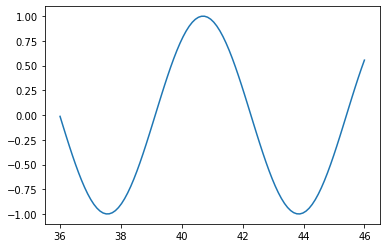

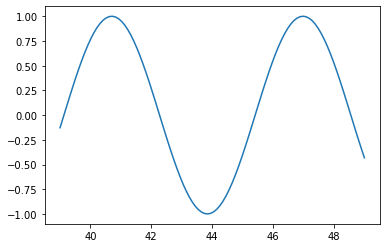

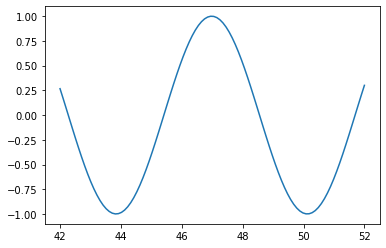

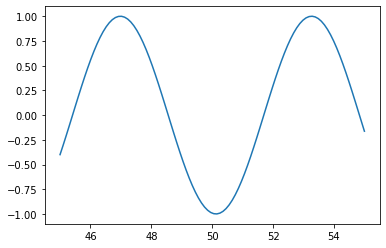

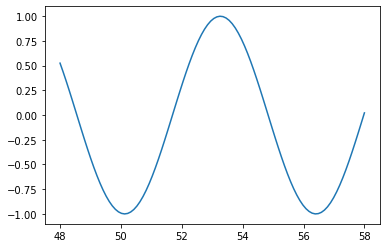

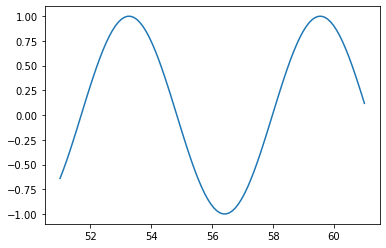

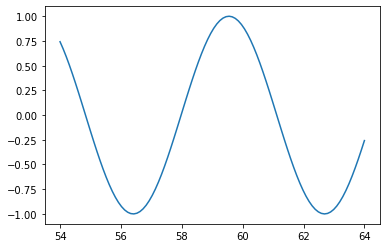

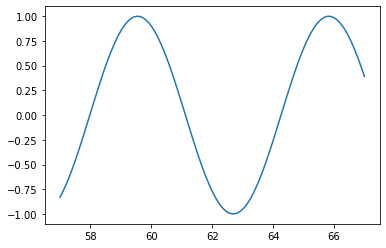

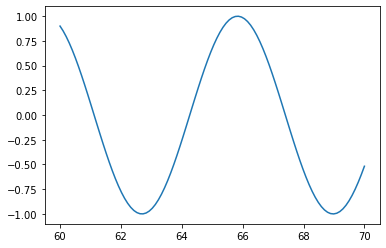

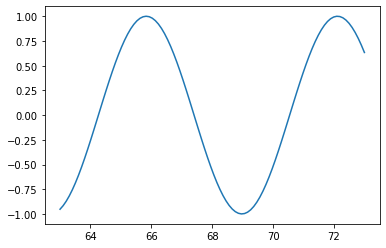

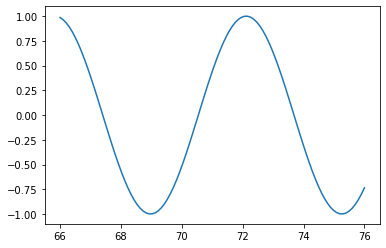

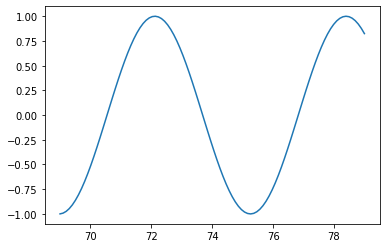

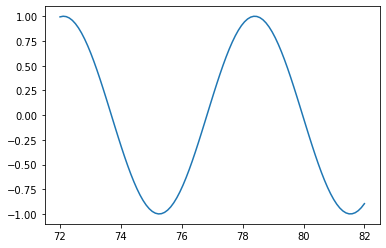

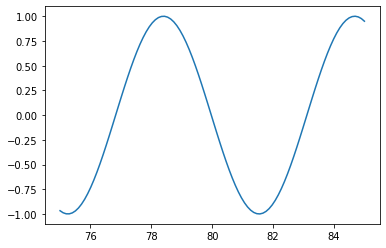

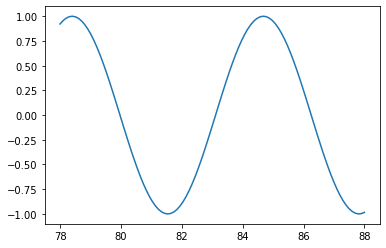

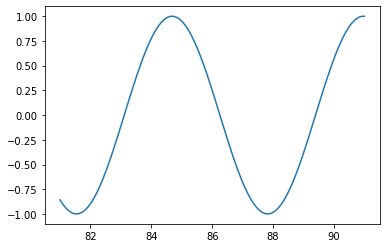

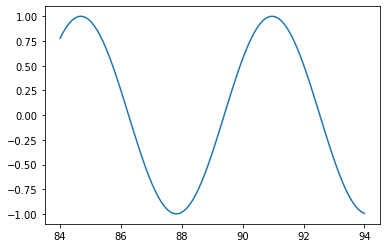

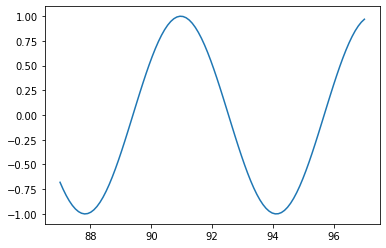

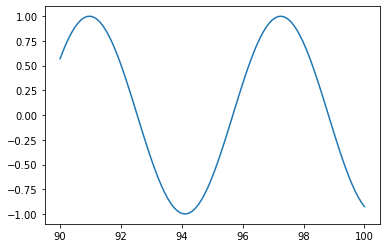

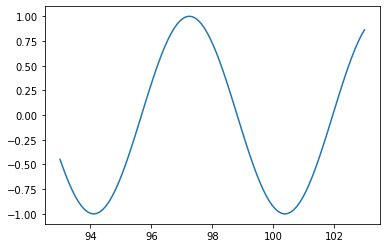

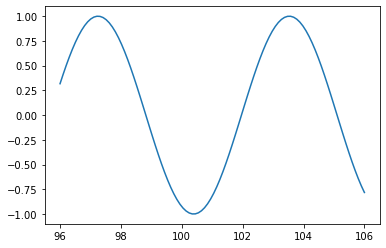

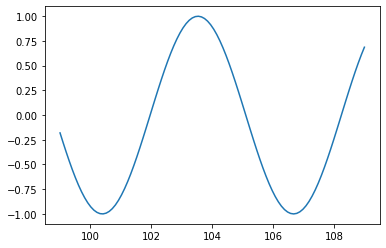

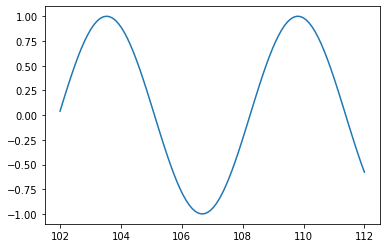

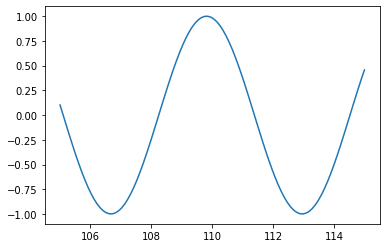

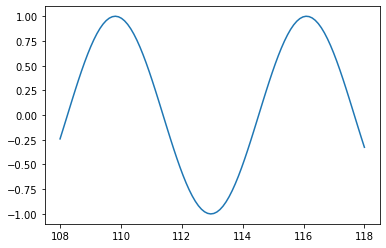

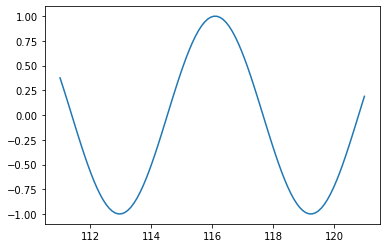

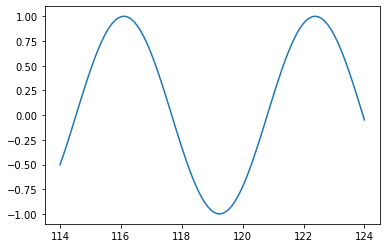

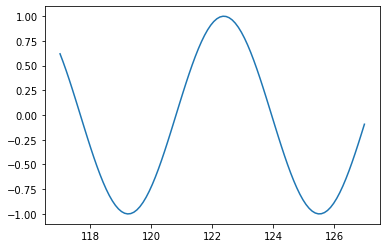

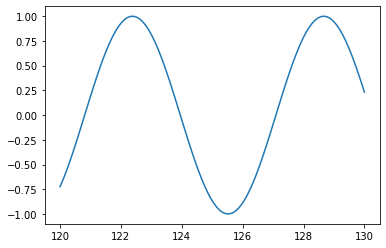

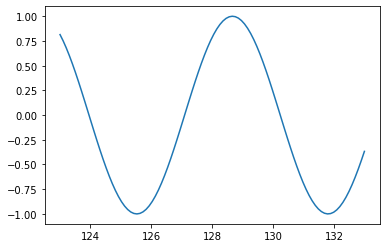

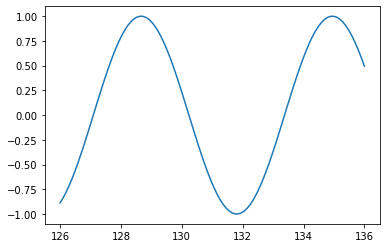

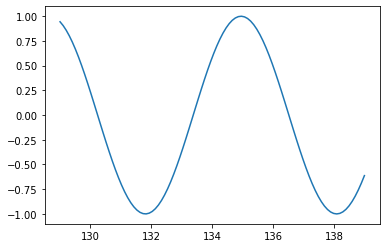

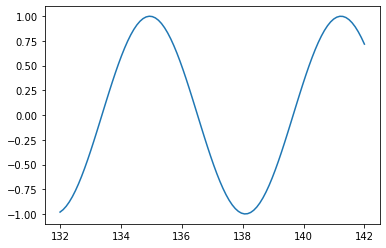

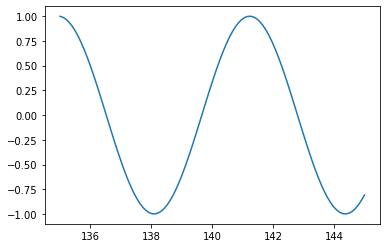

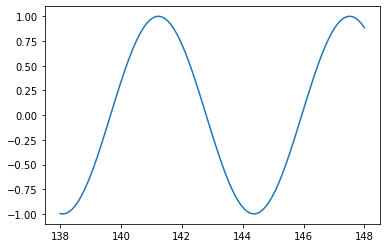

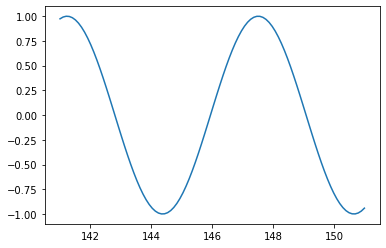

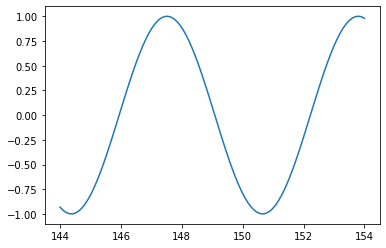

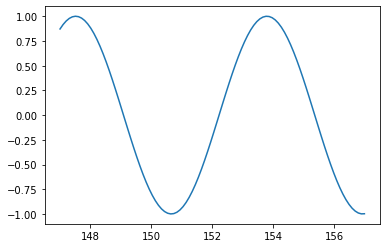

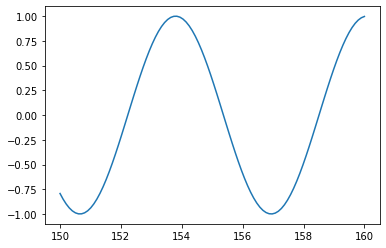

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

x = np.linspace(0, 10, 100)
y = np.cos(x)

# buat gambar plot
fig = plt.figure()

# p sebagai index untuk iterasi sebanyak 50 kali
for p in range(50):
    # p diawali dari 3
    p = 3
    # kemudian data x terupdate sesuai jumlah data p
    updated_x = x + p
    # data x merupakan cos dari data x
    updated_y=np.cos(x)

    # buat grafiknya
    plt.plot(updated_x,updated_y)
    # menggambar grafiknya
    plt.draw()  

    # buat data x dan data y baru
    x=updated_x
    y=updated_y
    plt.pause(0.2)
    fig.clear()

# Python Realtime Plotting



## Plot pake Local Script
make modul

*   random, untuk mengeluarkan angka acak sebagai value yang diinput ke data
*   count from itertools, fungsinya sama seperti range()

In [ ]:
# mengeluarkan angka acak
import random
# sama seperti range()
from itertools import count
import matplotlib.pyplot as plt
# modul untuk realtime
from matplotlib.animation import FuncAnimation

# style
plt.style.use('fivethirtyeight')

# bikin list value kosong pada data x dan y
x_values = []
y_values = []

# buat index berdasarkan perhitungan count()
index = count()

# buat fungsi untuk animate
def animate(i):
    # nilai x ditambah, value berupa index
    x_values.append(next(index))
    # nilai y ditambah, value berdasarkan randint
    y_values.append(random.randint(0, 5))

    # untuk menghapus axes sementara
    plt.cla()
    # gambarkan grafik garisnya
    plt.plot(x_values, y_values)

# panggil function animasinya
ani = FuncAnimation(plt.gcf(), animate, 1000)


plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## plot realitme dengan CSV make API
menggunakan API dari [Infosys (‘INFY’)](https://www.infosys.com/)

install nsetools untuk mengambil data harga langsung dari info sys sebagai q, kemudian tulis time nya dari datetime dan stftime

In [ ]:
!pip install nsetools

script buat bikin data csv "python_live_plot_data.csv"

In [ ]:
import csv
import time
import pandas as pd
from nsetools import Nse
from pprint import pprint
from datetime import datetime

nse = Nse()

# while True menjadikan infinite loop
# kalau pernyataannya terus memenuhi kondisi
while True:
    q = nse.get_quote('infy')
    now = datetime.now().strftime("%H:%M:%S")
    row = [now, q['lastPrice']]

    with open('python_live_plot_data.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(row)
      
    time.sleep(1)

KeyboardInterrupt: ignored

kemudian buat plot realtime nya

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

# masing - masing data untuk sumbu berbentuk list kosong
x_values = []
y_values = []

# kemudian menggunakan count pada index
index = count()


def animate():
    # ambil data csv nya
    data = pd.read_csv('python_live_plot_data.csv')
    # tampung value
    x_values = data['Time']
    y_values = data['Price']
    # untuk menghapus axes sementara
    plt.cla()
    # buat plot baru
    plt.plot(x_values, y_values)
    # buat label dan title
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Infosys')
    # panggil function animasinya
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

ani = FuncAnimation(plt.gcf(), animate, 5000)

plt.tight_layout()
plt.show()

# Real time Data Visualization dengan Python
- variable y harus diubah jadi float dlu biar bisa diurutin
- data tentang orang yang menyukai group band payung teduh di Indonesia
- menggunakan data dummy (dibuat sendiri)
- kalau data diubah maka grafik akan berubah (realtime)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


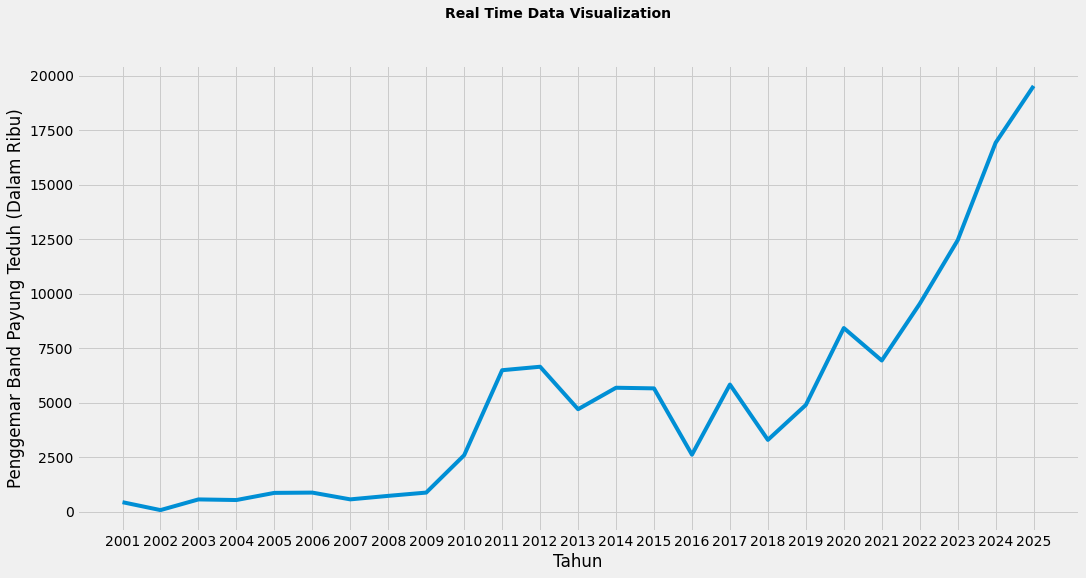

In [ ]:
# library buat visualisasi data
import matplotlib.pyplot as plt
# visualisasi animasi
import matplotlib.animation as animation
# import style dari matplotlib, trus pake 538
from matplotlib import style
style.use('fivethirtyeight')

# variabel fig, untuk menyimpan gambar plot (figure) 
fig = plt.figure()
# buat judul, sama atur ukuran ama weight
fig.suptitle('Real Time Data Visualization ', fontsize = 14, 
             fontweight = 'bold')
# set_size_inches(),atur ukuran gambar
fig.set_size_inches(16, 8)

# add_subplot(), biar gampang bikin layoutnya
ax1 = fig.add_subplot(1, 1, 1)

# animate(), buat gambar graph 
# menggunakan parameter i, untuk iterasi
def animate(i):
    # ngebaca data (dalam bentuk text)
    # readlines(), membaca baris per baris
    graph_data = open('data.txt', 'r').readlines()
    # dibacanya dari data index ke 1 sampai terakhir
    # yang ke 0 di skip karena buat keterangan
    lines = graph_data[1:]
    # variabel array untuk menyimpan data dari sumbu x dan y
    xs = []
    ys = []
    # iterasi tiap line
    for line in lines:
        # kalau line lebih dari satu, program bakal dijalanin
        if len(line) > 1:
            # iterasi tiap line 
            # koma (,) buat split (memecah) x ama y biar sama kyk di notepad
            x, y = line.split(',')
            # kemudian data di tampung di variabel array masing - masing 
            xs.append(x)
            # biar berurutan, data y dijadiin float (asalnya int)
            ys.append(float(y))
    # kelar perulangan, data diapus biar di refresh
    ax1.clear()
    # buat grafik garis
    ax1.plot(xs, ys)
    # pasang label masing - masing ke sumbu x dan y
    ax1.set_xlabel("Tahun")
    ax1.set_ylabel("Penggemar Band Payung Teduh (Dalam Ribu)")
    # simpan gambarnya
    plt.savefig("Hasil Update PNG.png")

# panggil fungsi animation, kemudian masukan parameter fig, animate 
# dan atur intervalnya
ani = animation.FuncAnimation(fig, animate, interval = 1000)
# tampilkan gambarnya
plt.show()

# Live Graphs with Matplotlib
bikin grafik yang terupdate secara live, yang grafiknya berubah seiring bertambahnya data pada sumbernya

pake function animation dari matplotlib

In [ ]:
# import library
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

panggil style dari matplotlib

kemudian tambahkan subplot biar gampang ngatur layoutnya

codingan dari fig, function sampai manggil functionnya jangan kepisah, ga bakal muncul codenya

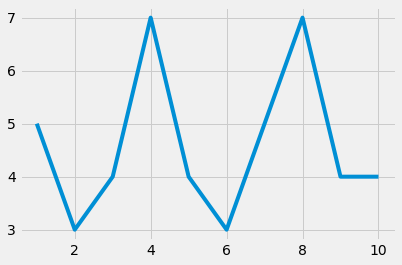

In [ ]:
style.use('fivethirtyeight')

# untuk menyimpan gambar plot (figure) pake variable fig
fig = plt.figure()
# biar gampang bikin layoutnya pake function add_subplot
ax1 = fig.add_subplot(1,1,1)

# buat function untuk animasi dengan parameter i untuk iterasi
def animate(i):
    # data yang bakal di plot, dibaca dari text data
    graph_data = open('example.txt','r').read()
    # dibaca perbaris, dengan memecah (split) dengan karakter '\n'
    lines = graph_data.split('\n')
    # variabel array untuk menampung data dari tiap sumbu
    xs = []
    ys = []
    # untuk perulangan agar membaca data perbaris 
    # berulang karena data akan diupdate terus
    for line in lines:
        # kalau barisnya lebih dari 1
        if len(line) > 1:
            # iterasi tiap data perbaris
            # data x dan y terpisah dengan koma (,)
            x, y = line.split(',')
            # masing - masing data diampung pada variabel arraynya
            # harus diubah jadi float biar gampang terurut
            xs.append(float(x))
            ys.append(float(y))
    # kelar perulangan, data diapus biar di refresh
    ax1.clear()
    # buat grafik garis
    ax1.plot(xs, ys)

# panggil fungction FuncAnimaton dari modul animation
# masukan parameter fig, animate dan intervalnya (per mili detik)
ani = animation.FuncAnimation(fig, animate, interval=1000)
# tampilkan grafik
plt.show()

# grafik dibawah ini dapat berubah kalau ada data baru (baris baru)

# Plotting Live Data in Real-Time
plotting data yang seterusnya berubah secara realtime

seperti kasus menghitung youtuber subscriber

## menggunakan data dummy

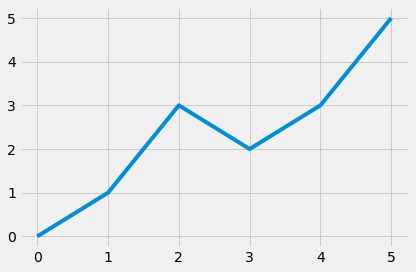

In [ ]:
# module random
import random
# import function count dari modul itertools
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt

# plot style 5:38
style.use('fivethirtyeight')

# membua plot static
# data yang bakal di plot, dalam bentuk list
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

# buat gambar plot, secara defaultnya line plot
plt.plot(x_vals, y_vals)

# index = count()

# def animate(i):
#     x_vals.append(next(index))
#     y_vals.append(random.randint(0, 5))

# buat nambahin padding otomatis ke grafiknya
plt.tight_layout()
# buat nampilin plotnya
plt.show()

membuat plot realtime dengan data dummy dari modul random

In [ ]:
# module random
import random
# import function count dari modul itertools
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
# import function funcanimation buat realtime dari modul animation
from matplotlib.animation import FuncAnimation

# plot style 5:38
style.use('fivethirtyeight')

# membuat plot yang dinamis
# data yang bakal di plot, dalam bentuk list kosong
# karena diisi di dalam function dan iterasi menggunakan modul random
x_vals = []
y_vals = []

# count(), untuk menggenerate angka satu persatu tiap waktu
index = count()

# pada function ini, menambahkan nilai ke list x dan y
def animate(i):
    # masing - masing di isi pake append()
    # menampung nilai dari count()
    x_vals.append(next(index))
    # menampung nilai dari function randint()
    # randint() untuk menggenerate angka sesuai interval parameter 
    # randint(<value_awal>, <value_batas>)
    y_vals.append(random.randint(0, 5))
    # karena tiap plot bakal ngejalanin plot baru tiap detik
    # jadinya data yang baru bakal numpuk di plot ini
    plt.cla()
    # setelah pake cla, biar plot yang ditampilkan lebih bersih
    # ga numpuk kaya tadi
    plt.plot(x_vals, y_vals)
    

# buat object untuk memanggil semua function diatas pake FuncAnimation
# plt.gcf(), get current figure
# trus panggil function diatas
# interval, satuan dari argumennya mili detik
ani = FuncAnimation(plt.gcf(), animate, interval = 1000)

# buat nambahin padding otomatis ke grafiknya
plt.tight_layout()
# buat nampilin plotnya
plt.show()

<Figure size 432x288 with 0 Axes>

## menggunakan data kasus real
buat data pake data generator

In [ ]:
# biar bisa nulis data csv
import csv
# buat manggil angka random
import random
import time

# nilai awal
x_value = 0
total_1 = 1000
total_2 = 1000

# buat nama kolom untuk header csv file nya
fieldnames = ["x_value", "total_1", "total_2"]

# buat nulis header ke csv nya
with open('data.csv', 'w') as csv_file:
    # pake dict writer, terus masukin field yang diatas
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    # tulis headernya
    csv_writer.writeheader()

# kalau True bakal jalan terus programnya
while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)

penerapan python real time ke data csv

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

# Animate Data Using Python
 View Live Data With Just MatPlotLib
* biar bisa update plot secara real-time atau kapanpun
* menggunakan FuncAnimation, metode biar bisa update grafik kapan pun


 Tahapan
* inisialisasi subplot
  * bikin subplot biar makin gampang buat gambar plot yang sama  
* bikin function animasi
  * function animation(i) dipake buat gambar garisnya terus terusan
  * di function sini bakal manggil function FuncAnimation dari matplotlib terus - terusan, ampe kelar programnya
  * metode ini bakal manggil tiap iterasi i nya
  * tiap iterasi i berdasarkan perbaris dataset
* Jalankan plot visualisasi  
  * sebelum di visualiasi, panggil function animasinya dulu




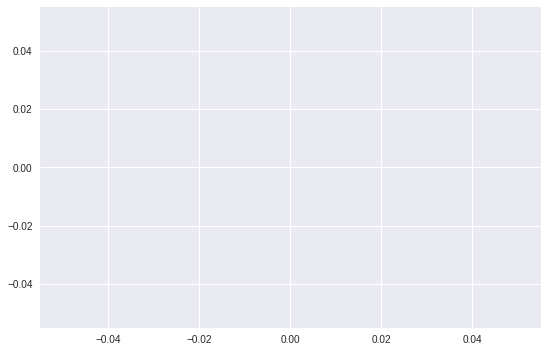

In [ ]:
import matplotlib.pyplot as plt
# buat plot realtime
from matplotlib.animation import FuncAnimation
import pandas as pd

# inisailisasi subplot
plt.style.use('seaborn')
# buat atur gambar plotnya
fig = plt.figure()
# bikin suplot
# valuenya berarti pada posisi pertama 
# pada satu subplot di baris pertama dan kolom pertama
ax = fig.add_subplot(111)

# bikin function untuk animation
def animation(i):
  apple_stock = AAPL_STOCK 
  # data list kosong
  x = []
  y = []

  # trus datanya diambah
  x = AAPL_STOCK[0:i]['AAPL_x']
  y = AAPL_STOCK[0:i]['AAPL_y']
  
  # menghapus graph yang masih ada
  ax.clear()
  # untuk menggambar graph
  ax.plot(x, y)

# jalankan function FuncAnimate, parameternya masukin function animationnya
animation = FuncAnimation(fig, func=animation, interval=1000)
plt.show()

# Anotasi pada Visualisasi
cara menambahkan teks ke grafik
*   nempatin teks ke paragraf sesuai titik kordinat
*   secara spesifik anotasi ke plot 

In [ ]:
pip install mpl-finance

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

ModuleNotFoundError: ignored

# Subplot
untuk membuat banyak plot dalam satu grafik


In [ ]:
import random
import matplotlib.pyplot as plt
from matplotlib import style

# buat gambar grafik
style.use('fivethirtyeight')

fig = plt.figure()

# bikin function buat bikin plot secara acak
def create_plots():
    xs = []
    ys = []

    for i in range(10):
        x = i
        y = random.randrange(10)

        xs.append(x)
        ys.append(y)
    return xs, ys

<Figure size 432x288 with 0 Axes>

kemudian buat subplot

bikin 3 subplot, yaitu 
* height, 221
  * tinggi 2 
  * lebar 2
  * plot number 1
* width, 222
  * tinggi 2
  * lebar 2
  * plot number 2
* plot number, 212
  * tinggi 2
  * lebar 1
  * plot number 1

In [ ]:
# add_subplot(height width plotnumber)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same argumen